<a href="https://colab.research.google.com/github/sindhujajakkula/Gauss_points/blob/main/dlsample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import torch
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("/content/Sample_data.csv") #importing csv file into dataframe

In [3]:
dataset #displaying dataframe

,E,nu,B_x,C_x,C_y,D_x,D_y,Gauss Points
0,8.000000e+10,0.325,1.286834,0.491369,1.588519,-0.452813,1.472879,3
1,2.000000e+11,0.250,0.893351,0.721683,0.924287,-0.244848,1.044743,3
2,8.000000e+10,0.275,1.782956,1.409239,1.228062,-0.527555,1.502008,3
3,1.600000e+11,0.200,0.939067,1.006932,0.967393,-0.041010,0.984627,3
4,8.000000e+10,0.275,1.035314,0.581292,0.991668,-0.313221,0.644734,3
...,...,...,...,...,...,...,...,...
99995,1.800000e+11,0.325,1.350164,1.576151,1.495129,-0.228413,1.223775,3
99996,1.200000e+11,0.250,0.992425,0.798062,1.295789,-0.065018,0.897140,3
99997,1.800000e+11,0.300,0.964931,1.085251,0.929633,0.079629,0.988081,3
99998,1.000000e+11,0.250,1.030711,1.254512,1.043643,0.061652,0.684041,3


In [4]:
#shuffling dataframe
from sklearn.utils import shuffle

dataset1 = shuffle(dataset)
print(dataset1.head())

                  E     nu       B_x       C_x       C_y       D_x       D_y  \
11776  1.800000e+11  0.250  1.114373  1.096801  1.616714 -0.469145  1.729705   
22415  1.200000e+11  0.250  0.790735  0.941065  1.096623 -0.388763  0.745635   
6023   1.000000e+11  0.225  1.434278  1.724800  0.881097 -0.187953  1.359087   
25730  1.600000e+11  0.300  0.693181  1.212381  1.568582 -0.157035  1.595653   
51799  1.200000e+11  0.275  1.146302  0.520907  1.216765 -0.254164  0.484781   

       Gauss Points  
11776             3  
22415             4  
6023              3  
25730             4  
51799             4  


In [5]:
dataset1.columns #columns in the dataframe

Index(['E', 'nu', 'B_x', 'C_x', 'C_y', 'D_x', 'D_y', 'Gauss Points'], dtype='object')

In [6]:
X = dataset1.drop('Gauss Points',axis=1).values #creating input array
y = dataset1['Gauss Points'].values #creating output array

In [7]:
dataset1

,E,nu,B_x,C_x,C_y,D_x,D_y,Gauss Points
11776,1.800000e+11,0.250,1.114373,1.096801,1.616714,-0.469145,1.729705,3
22415,1.200000e+11,0.250,0.790735,0.941065,1.096623,-0.388763,0.745635,4
6023,1.000000e+11,0.225,1.434278,1.724800,0.881097,-0.187953,1.359087,3
25730,1.600000e+11,0.300,0.693181,1.212381,1.568582,-0.157035,1.595653,4
51799,1.200000e+11,0.275,1.146302,0.520907,1.216765,-0.254164,0.484781,4
...,...,...,...,...,...,...,...,...
94954,2.000000e+11,0.275,0.592266,0.807746,1.477117,-0.463341,1.135511,4
42827,1.400000e+11,0.325,0.994143,0.836773,0.888880,-0.021417,1.085397,3
81837,2.000000e+11,0.325,1.372257,1.445290,1.257390,-0.048637,1.436578,3
80455,1.200000e+11,0.200,0.684170,1.300908,1.425638,0.313624,1.594191,3


In [8]:
X

array([[ 1.80000000e+11,  2.50000000e-01,  1.11437264e+00, ...,
         1.61671357e+00, -4.69145084e-01,  1.72970532e+00],
       [ 1.20000000e+11,  2.50000000e-01,  7.90735084e-01, ...,
         1.09662335e+00, -3.88763210e-01,  7.45634820e-01],
       [ 1.00000000e+11,  2.25000000e-01,  1.43427768e+00, ...,
         8.81097252e-01, -1.87953350e-01,  1.35908719e+00],
       ...,
       [ 2.00000000e+11,  3.25000000e-01,  1.37225670e+00, ...,
         1.25739038e+00, -4.86370170e-02,  1.43657809e+00],
       [ 1.20000000e+11,  2.00000000e-01,  6.84170257e-01, ...,
         1.42563753e+00,  3.13623933e-01,  1.59419075e+00],
       [ 1.40000000e+11,  2.75000000e-01,  6.46165923e-01, ...,
         1.48007816e+00,  3.59649136e-01,  1.37399007e+00]])

In [9]:
y

array([3, 4, 3, ..., 3, 3, 3])

In [10]:
X = torch.FloatTensor(X) #array to tensor 

In [11]:
type(X)

torch.Tensor

In [12]:
X.dtype #tensor element datatype

torch.float32

In [13]:
y = torch.LongTensor(y) #array to tensor

In [14]:
type(y)

torch.Tensor

In [15]:
y.dtype

torch.int64

In [16]:
unique_targets = torch.unique(y) #finding the unique values of gauss points column

In [17]:
unique_targets

tensor([2, 3, 4, 5])

Mapping the unique values in target to numbers starting from 0

In [18]:
y_new = torch.empty_like(y) #creating new tensor with same dimensions as output ttetnsor
for idx, t in enumerate(unique_targets):
    print('replacing {} with {}'.format(t, idx))
    y_new[y == t] = idx

replacing 2 with 0
replacing 3 with 1
replacing 4 with 2
replacing 5 with 3


In [19]:
y_new #new mapped target column

tensor([1, 2, 1,  ..., 1, 1, 1])

In [20]:
y

tensor([3, 4, 3,  ..., 3, 3, 3])

In [21]:
torch.unique(y_new)

tensor([0, 1, 2, 3])

In [22]:
torch.unique(y)

tensor([2, 3, 4, 5])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y_new,test_size=0.20) #splitting data into training and test data

In [24]:
len(X_train)

80000

In [25]:
len(y_train)

80000

In [26]:
len(X_test)

20000

In [27]:
len(y_test)

20000

In [28]:
X_train

tensor([[ 1.6000e+11,  3.0000e-01,  1.1575e+00,  ...,  1.0728e+00,
         -2.7846e-01,  1.2222e+00],
        [ 1.2000e+11,  2.0000e-01,  1.0592e+00,  ...,  9.9846e-01,
          4.6108e-02,  1.2873e+00],
        [ 1.4000e+11,  3.0000e-01,  9.7874e-01,  ...,  8.8130e-01,
         -6.4245e-02,  9.9925e-01],
        ...,
        [ 1.8000e+11,  2.7500e-01,  1.1337e+00,  ...,  1.3665e+00,
          3.8360e-01,  1.4910e+00],
        [ 1.2000e+11,  3.0000e-01,  7.4433e-01,  ...,  7.5705e-01,
          2.9786e-01,  9.1756e-01],
        [ 2.0000e+11,  2.2500e-01,  8.3040e-01,  ...,  1.0102e+00,
         -1.9692e-01,  1.0477e+00]])

In [29]:
y_train

tensor([1, 1, 1,  ..., 1, 1, 1])

In [30]:
X_test

tensor([[ 1.8000e+11,  2.2500e-01,  1.4152e+00,  ...,  1.6101e+00,
          7.2635e-02,  1.8447e+00],
        [ 1.8000e+11,  2.0000e-01,  1.6845e+00,  ...,  6.2512e-01,
          8.0614e-02,  1.1944e+00],
        [ 2.0000e+11,  2.2500e-01,  5.3362e-01,  ...,  8.9447e-01,
         -2.1376e-01,  7.4116e-01],
        ...,
        [ 1.2000e+11,  2.0000e-01,  1.0793e+00,  ...,  1.4087e+00,
         -3.1076e-01,  8.4109e-01],
        [ 1.6000e+11,  3.0000e-01,  8.4360e-01,  ...,  1.0440e+00,
         -2.0730e-01,  1.2683e+00],
        [ 2.0000e+11,  2.0000e-01,  7.1572e-01,  ...,  1.3217e+00,
          7.1700e-02,  1.3295e+00]])

In [31]:
y_test

tensor([1, 2, 1,  ..., 1, 1, 1])

Creating Model

* Fully Connected Layer 7 input features, 20 output features (arbitrary)
* Fully Connected Layer 20 input features, 30 output features (arbitrary)
* Output Layer 30 input features , 4 output features

ReLU (rectified linear unit) as activation function.

In [43]:
#creating model class with 2 hidden layers
class Model(nn.Module):
    def __init__(self, input_features=7, hidden_layer1=20, hidden_layer2=30, output_features=4):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                  
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)                  
        self.out = nn.Linear(hidden_layer2, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [44]:
model = Model()
model

Model(
  (fc1): Linear(in_features=7, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=4, bias=True)
)

Setting hyperparameters:
learning rate = 0.01

We will use Cross Entropy and Adam optimizer.

In [45]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Training

In [46]:
epochs = 200
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 2864301568.00000000
epoch:  1  loss: 3209477120.00000000
epoch:  2  loss: 1102231040.00000000
epoch:  3  loss: 879730944.00000000
epoch:  4  loss: 500101760.00000000
epoch:  5  loss: 1038526208.00000000
epoch:  6  loss: 219409424.00000000
epoch:  7  loss: 638298304.00000000
epoch:  8  loss: 909528192.00000000
epoch:  9  loss: 1043400448.00000000
epoch: 10  loss: 1063638144.00000000
epoch: 11  loss: 1003881728.00000000
epoch: 12  loss: 1499765376.00000000
epoch: 13  loss: 957758528.00000000
epoch: 14  loss: 934505536.00000000
epoch: 15  loss: 926981632.00000000
epoch: 16  loss: 872287232.00000000
epoch: 17  loss: 777214528.00000000
epoch: 18  loss: 649630976.00000000
epoch: 19  loss: 496403104.00000000
epoch: 20  loss: 323289760.00000000
epoch: 21  loss: 368661376.00000000
epoch: 22  loss: 493189504.00000000
epoch: 23  loss: 198728192.00000000
epoch: 24  loss: 248624864.00000000
epoch: 25  loss: 263984352.00000000
epoch: 26  loss: 249934800.00000000
epoch: 27  loss: 210

Text(0.5, 0, 'epoch')

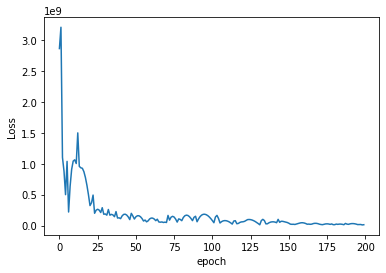

In [47]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

Validating and testing the model

In [48]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [49]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df

,Y,YHat,Correct
0,1,1,1
1,2,1,0
2,1,1,1
3,0,1,0
4,1,1,1
...,...,...,...
19995,2,1,0
19996,1,1,1
19997,1,1,1
19998,1,1,1


Accuracy

In [50]:
df['Correct'].sum() / len(df)

0.7677